In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
recipes_df = pd.read_csv('recipes.csv', delimiter = ",") # read in the data and print it
recipes_df # Note that the first line of the csv-file is interpreted as variable names (which fits in this case!). 

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
0,0,True,True,True,False,1.0,3,633998,Banana Blueberry Pancakes,55.79,...,0.49,2.44,0.03,2.26,18.11,1.81,NaN,NaN,NaN,NaN
1,1,True,True,False,False,0.0,1,634426,Basil and Orange Confit Compound Butter,15.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,False,False,False,False,3.0,1,635085,Black Bottom Banana Bars,78.85,...,2.63,13.13,0.32,21.09,100.80,10.08,0.28,1.53,9.89,3.30
3,3,True,False,True,False,2.0,1,663229,The Best Raw Chocolate Chip Cookies,54.64,...,0.65,3.26,0.10,6.47,26.79,2.68,NaN,NaN,NaN,NaN
4,4,False,True,False,False,31.0,3,651437,Mediterranean Spinach Artichoke Dip,115.26,...,0.66,3.29,0.07,4.64,162.84,16.28,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,False,True,True,False,18.0,13,638315,"Chicken Sausage, White Bean and Cabbage Soup",196.23,...,0.53,2.67,0.15,10.23,102.67,10.27,NaN,NaN,NaN,NaN
146,146,True,False,False,False,1.0,2,656248,Pinot Noir Brownies,65.76,...,0.21,1.07,0.03,1.68,19.82,1.98,2.48,13.76,10.69,3.56
147,147,True,True,True,True,93.0,2,637297,Cauliflower Chickpea Stew,139.28,...,4.77,23.83,0.45,29.70,141.16,14.12,NaN,NaN,NaN,NaN
148,148,True,True,False,False,5.0,1,659412,Sautéed Balsamic Green Beans With Cherry Tomatoes,101.81,...,1.15,5.73,0.12,7.85,55.64,5.56,NaN,NaN,NaN,NaN


In [3]:
recipes_df.columns[recipes_df.isna().any()].tolist() #Print the names of Columns that have null values

['FiberAmount',
 'FiberpercentOfDailyNeed',
 'VitaminB6Amount',
 'VitaminB6percentOfDailyNeed',
 'ManganeseAmount',
 'ManganesepercentOfDailyNeed',
 'SeleniumAmount',
 'SeleniumpercentOfDailyNeed',
 'PotassiumAmount',
 'PotassiumpercentOfDailyNeed',
 'VitaminB2Amount',
 'VitaminB2percentOfDailyNeed',
 'VitaminCAmount',
 'VitaminCpercentOfDailyNeed',
 'PhosphorusAmount',
 'PhosphoruspercentOfDailyNeed',
 'FolateAmount',
 'FolatepercentOfDailyNeed',
 'VitaminB5Amount',
 'VitaminB5percentOfDailyNeed',
 'MagnesiumAmount',
 'MagnesiumpercentOfDailyNeed',
 'IronAmount',
 'IronpercentOfDailyNeed',
 'VitaminKAmount',
 'VitaminKpercentOfDailyNeed',
 'CopperAmount',
 'CopperpercentOfDailyNeed',
 'VitaminAAmount',
 'VitaminApercentOfDailyNeed',
 'VitaminB12Amount',
 'VitaminB12percentOfDailyNeed',
 'VitaminDAmount',
 'VitaminDpercentOfDailyNeed',
 'ZincAmount',
 'ZincpercentOfDailyNeed',
 'VitaminEAmount',
 'VitaminEpercentOfDailyNeed',
 'VitaminB3Amount',
 'VitaminB3percentOfDailyNeed',
 'Vitami

In [4]:
#Print the highest value in column aggregateLikes
highest_value = recipes_df['aggregateLikes'].max()
highest_value

16911

In [5]:
#Print the column of highest value from column aggregateLikes
recipes_df[recipes_df['aggregateLikes']==recipes_df['aggregateLikes'].max()]

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
50,50,False,True,True,False,4.0,16911,715419,Slow Cooker Spicy Hot Wings,101.43,...,7.42,37.09,0.08,5.0,44.21,4.42,NaN,NaN,NaN,NaN


In [6]:
#Count the NaN value in column CalciumpercentOfDailyNeed
recipes_df['CalciumpercentOfDailyNeed'].isna().sum()

8

In [7]:
#Replace the NaN value with 0 in column CalciumpercentOfDailyNeed
recipes_df['CalciumpercentOfDailyNeed']=recipes_df['CaffeinepercentOfDailyNeed'].fillna(0)

In [8]:
#Count the NaN value in column CalciumpercentOfDailyNeed after replacing
recipes_df['CalciumpercentOfDailyNeed'].isna().sum()

0

In [9]:
#Sort by id column
sorted_by_id = recipes_df.sort_values(by=['id'])
sorted_by_id

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
83,83,False,False,False,False,5.0,0,45945,Oeufs En Meurette,209.85,...,1.51,7.56,0.15,10.13,124.54,0.00,NaN,NaN,NaN,NaN
43,43,False,False,False,False,44.0,1,622825,Tortilla Burger Loco Vaca,407.86,...,12.82,64.12,0.35,23.42,281.97,0.00,NaN,NaN,NaN,NaN
104,104,False,False,False,False,4.0,1,631769,"Bad Boy"" Giant Double Chocolate Cookies",44.08,...,1.73,8.63,0.20,13.42,64.05,11.35,NaN,NaN,34.04,11.35
95,95,False,True,True,False,9.0,1,632084,Allergy-Free Stuffed Portobello Mushrooms,138.47,...,4.59,22.96,0.09,6.05,28.08,0.00,NaN,NaN,NaN,NaN
52,52,False,False,False,False,2.0,16,632101,Almond Butter and Chocolate Squares,92.26,...,0.81,4.04,0.04,2.51,86.99,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,True,True,True,True,77.0,1,1096268,Garlic-Roasted Brussels Sprouts Side Dish,170.34,...,1.23,6.13,0.23,15.57,83.41,0.00,NaN,NaN,NaN,NaN
30,30,True,True,True,False,17.0,1,1096306,Vegan Chana Masala Curry,165.89,...,2.14,10.71,0.20,13.09,154.27,0.00,NaN,NaN,NaN,NaN
118,118,False,True,True,False,38.0,1,1096323,Potato & Leek Soup with Roasted Beets,244.08,...,2.43,12.15,0.10,6.47,101.41,0.00,NaN,NaN,NaN,NaN
39,39,True,True,True,False,7.0,6,1098357,Three Ingredient Frozen Pina Colada,214.60,...,1.05,5.25,0.19,12.66,52.87,0.00,13.36,74.22,NaN,NaN


In [10]:
#Count the 141 value in dataframe
(recipes_df.isnull().sum()==141).sum()

2

In [11]:
#Drop the 141 value column from the dataframe
(recipes_df.loc[:,~(recipes_df==141).any()])

,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,readyInMinutes,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
0,True,True,True,False,1.0,3,633998,Banana Blueberry Pancakes,55.79,45,...,0.49,2.44,0.03,2.26,18.11,0.00,NaN,NaN,NaN,NaN
1,True,True,False,False,0.0,1,634426,Basil and Orange Confit Compound Butter,15.07,45,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,False,False,False,False,3.0,1,635085,Black Bottom Banana Bars,78.85,45,...,2.63,13.13,0.32,21.09,100.80,3.30,0.28,1.53,9.89,3.30
3,True,False,True,False,2.0,1,663229,The Best Raw Chocolate Chip Cookies,54.64,45,...,0.65,3.26,0.10,6.47,26.79,0.00,NaN,NaN,NaN,NaN
4,False,True,False,False,31.0,3,651437,Mediterranean Spinach Artichoke Dip,115.26,45,...,0.66,3.29,0.07,4.64,162.84,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,False,True,True,False,18.0,13,638315,"Chicken Sausage, White Bean and Cabbage Soup",196.23,45,...,0.53,2.67,0.15,10.23,102.67,0.00,NaN,NaN,NaN,NaN
146,True,False,False,False,1.0,2,656248,Pinot Noir Brownies,65.76,45,...,0.21,1.07,0.03,1.68,19.82,3.56,2.48,13.76,10.69,3.56
147,True,True,True,True,93.0,2,637297,Cauliflower Chickpea Stew,139.28,45,...,4.77,23.83,0.45,29.70,141.16,0.00,NaN,NaN,NaN,NaN
148,True,True,False,False,5.0,1,659412,Sautéed Balsamic Green Beans With Cherry Tomatoes,101.81,45,...,1.15,5.73,0.12,7.85,55.64,0.00,NaN,NaN,NaN,NaN


In [12]:
# Print the title of the recipes that are vegetarian == TRUE and glutenFree == True
recipes_df[(recipes_df['vegetarian'] == True) & (recipes_df['glutenFree'] == True) ].title.tolist()

['Banana Blueberry Pancakes',
 'Basil and Orange Confit Compound Butter',
 'Spicy Carrot Amaranth Soup',
 'Nutty Rice',
 'Fire Roasted Tomato Chutney',
 'Butternut Squash Soup',
 'Green Beans with Garlic Chips',
 'Easy Eggplant Parmesan',
 'Kappa Maki',
 'Vegan Chana Masala Curry',
 'Grilled Peach Melba with Vanilla Bean Frozen Yogurt',
 'Detox Orange Carrot Juice',
 'Roasted Asparagus with Egg Salad',
 'Three Ingredient Frozen Pina Colada',
 'Peach Coconut Ice Cream',
 'Sautéed Balsamic Green Beans With Cherry Tomatoes',
 'Ginger Melon Side Salad ',
 'Chicken with Avocado Peach Salsa',
 'EASY, CUMIN-LENTIL SPREAD',
 'Luscious Palak Paneer',
 'Beet Slaw',
 'Roasted Strawberry Coconut Milk Ice Cream',
 'Breakfast Porridge',
 'Peanut Butter Cookies with Flax Seeds and Chocolate',
 'Blender Carrot Soup',
 'Dandelion pesto',
 'Coconut Flour Muffins',
 'Japanese Cucumber Salad',
 'Blueberry Mojito Popsicles',
 'Fried Brown Rice',
 'Seasonal Autumn Stew',
 'Slow Cooker Healthy Sweet Potato S

In [13]:
# How many vegan recipes are there (Vegan = Vegetarian and dairy free)
len(recipes_df[(recipes_df['vegetarian'] == True) & (recipes_df['dairyFree'] == True) ].title.tolist())

29

In [14]:
# Compare the average amount of Vitamin B12 for the vegan
vegan =recipes_df[recipes_df['vegetarian'] == True].VitaminB12Amount.mean()
vegan 

0.48357142857142854

In [15]:
#Compare the average amount of Vitamin B12 for the non-vegan recipes. 
Non_vegan = recipes_df[recipes_df['vegetarian'] == False].VitaminB12Amount.mean()
Non_vegan 

1.235384615384615

In [16]:
# How reliable are the results?
if vegan > Non_vegan :
    print('Non vegan has less Vit- B12')
else:
    print('Vegan has less Vit- B12')

Vegan has less Vit- B12


In [17]:
#Average health Score for Vegan recipes
Vegan_health = recipes_df[recipes_df['vegetarian'] == True]['healthScore'].mean()

In [18]:
#Average health Score for Non-Vegan recipes
Non_Vegan_health = recipes_df[recipes_df['vegetarian'] == False]['healthScore'].mean()
Non_Vegan_health

22.107142857142858

In [20]:
# Compare the health scorefor both recipes
if Vegan_health > Non_Vegan_health :
    print('Non vegan has less health score')
else:
    print('Vegan has less health score')

Vegan has less health score


In [22]:
#Create a new column: "VeganWeek" where you decrease the price of vegan products by 10%, but only if they already cost more than 100.
vegan_above_100 = recipes_df[(recipes_df['vegetarian'] == True) & (recipes_df['pricePerServing'] > 100)]
recipes_df['VeganWeek']=vegan_above_100['pricePerServing']*0.9
recipes_df

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed,VeganWeek
0,0,True,True,True,False,1.0,3,633998,Banana Blueberry Pancakes,55.79,...,2.44,0.03,2.26,18.11,0.00,NaN,NaN,NaN,NaN,NaN
1,1,True,True,False,False,0.0,1,634426,Basil and Orange Confit Compound Butter,15.07,...,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
2,2,False,False,False,False,3.0,1,635085,Black Bottom Banana Bars,78.85,...,13.13,0.32,21.09,100.80,3.30,0.28,1.53,9.89,3.30,NaN
3,3,True,False,True,False,2.0,1,663229,The Best Raw Chocolate Chip Cookies,54.64,...,3.26,0.10,6.47,26.79,0.00,NaN,NaN,NaN,NaN,NaN
4,4,False,True,False,False,31.0,3,651437,Mediterranean Spinach Artichoke Dip,115.26,...,3.29,0.07,4.64,162.84,0.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,False,True,True,False,18.0,13,638315,"Chicken Sausage, White Bean and Cabbage Soup",196.23,...,2.67,0.15,10.23,102.67,0.00,NaN,NaN,NaN,NaN,NaN
146,146,True,False,False,False,1.0,2,656248,Pinot Noir Brownies,65.76,...,1.07,0.03,1.68,19.82,3.56,2.48,13.76,10.69,3.56,NaN
147,147,True,True,True,True,93.0,2,637297,Cauliflower Chickpea Stew,139.28,...,23.83,0.45,29.70,141.16,0.00,NaN,NaN,NaN,NaN,125.352
148,148,True,True,False,False,5.0,1,659412,Sautéed Balsamic Green Beans With Cherry Tomatoes,101.81,...,5.73,0.12,7.85,55.64,0.00,NaN,NaN,NaN,NaN,91.629


In [23]:
# Among the non-vegan recipes, find the one requiring most time to prepare. 
Non_vegan =recipes_df[(recipes_df['vegetarian'] == False)]
Non_vegan['readyInMinutes'].max()

328

In [24]:
#Build a model using linear regression on this dataset for readyInMinutes and CaloriesAmount
data = recipes_df[['readyInMinutes','CaloriesAmount']]
data

,readyInMinutes,CaloriesAmount
0,45,175.67
1,45,85.52
2,45,700.30
3,45,169.88
4,45,144.42
...,...,...
145,45,312.19
146,45,213.58
147,45,455.50
148,45,73.47


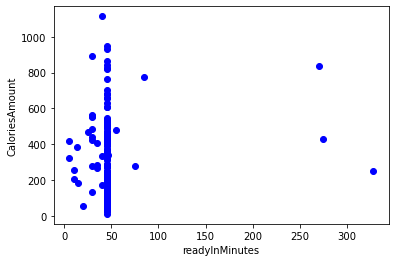

In [25]:
# plot 
plt.scatter(data['readyInMinutes'] , data['CaloriesAmount'] , color='blue')
plt.xlabel('readyInMinutes')
plt.ylabel('CaloriesAmount')
plt.show()

In [26]:
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

In [27]:
# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[['readyInMinutes']])
train_y = np.array(train[['CaloriesAmount']])
regr.fit(train_x,train_y)

LinearRegression()

In [28]:
# The coefficients:
print ('coefficients :' ,regr.coef_) #Slope
print ('Intercept : ',regr.intercept_) #Intercept

coefficients : [[0.60578553]]
Intercept :  [321.59573857]


Text(0, 0.5, 'Calories')

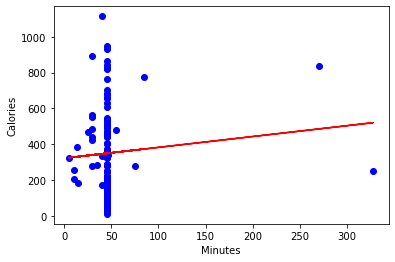

In [29]:
# Plotting the regression line:
plt.scatter(train['readyInMinutes'], train['CaloriesAmount'], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel('Minutes')
plt.ylabel('Calories')